In [3]:
import numpy as np
import pandas as pd
import altair as alt


In [42]:
def n01(x):
    return (x - x.min()) / (x.max() - x.min())

def salary(spd, strong):
    q1 = 1.0 / spd * np.random.normal(1.0, 0.1, size=N)
    q1 = n01(q1)
    q2 = n01(strong)
    q2 *= np.random.normal(1.0, 0.1, size=N)
    q3 = n01(q1 * 4.2 + q2)
    return q3 * 1.8 + 0.20

In [43]:
N = 300
np.random.seed(123)
spd = np.random.normal(20,2.5, size=N)
strong = np.random.uniform(150,250, size=N) * np.random.normal(1.0, 0.2, size=N)
d = pd.DataFrame(data={
    '100m dash (s)': spd,
    'bench press (lb)': strong,
    'salary': salary(spd, strong),
})

In [44]:
d[:10]

,100m dash (s),bench press (lb),salary
0,17.285923,173.203673,1.075616
1,22.493364,253.065697,0.685302
2,20.707446,176.980833,0.795570
3,16.234263,120.705261,1.248165
4,18.553499,210.126576,0.808496
5,24.128591,244.460253,0.778854
6,13.933302,212.878761,1.628889
7,18.927718,225.961854,0.976867
8,23.164841,81.069214,0.352196
9,17.833149,167.479235,1.105425


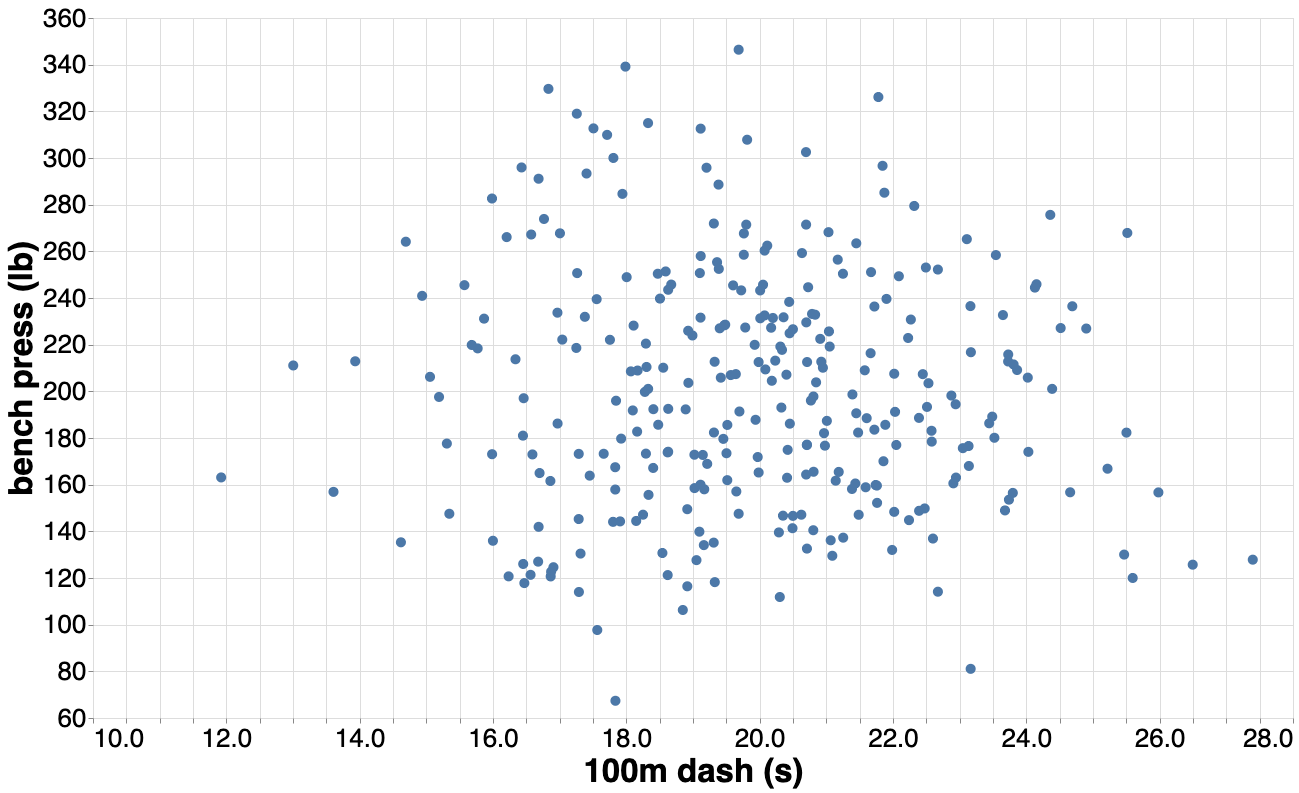

In [45]:
alt.Chart(data=d,
          height=700,
          width=1200,
).configure_axis(
    domain=False,
    labelFontSize=26,
    titleFontSize=33,
).mark_point(
    size=100,
    opacity=1.0,
    filled=True,
).encode(
    alt.X('100m dash (s)',
          scale=alt.Scale(zero=False),
         ),
    alt.Y('bench press (lb)',
          scale=alt.Scale(zero=False),
         ),
)

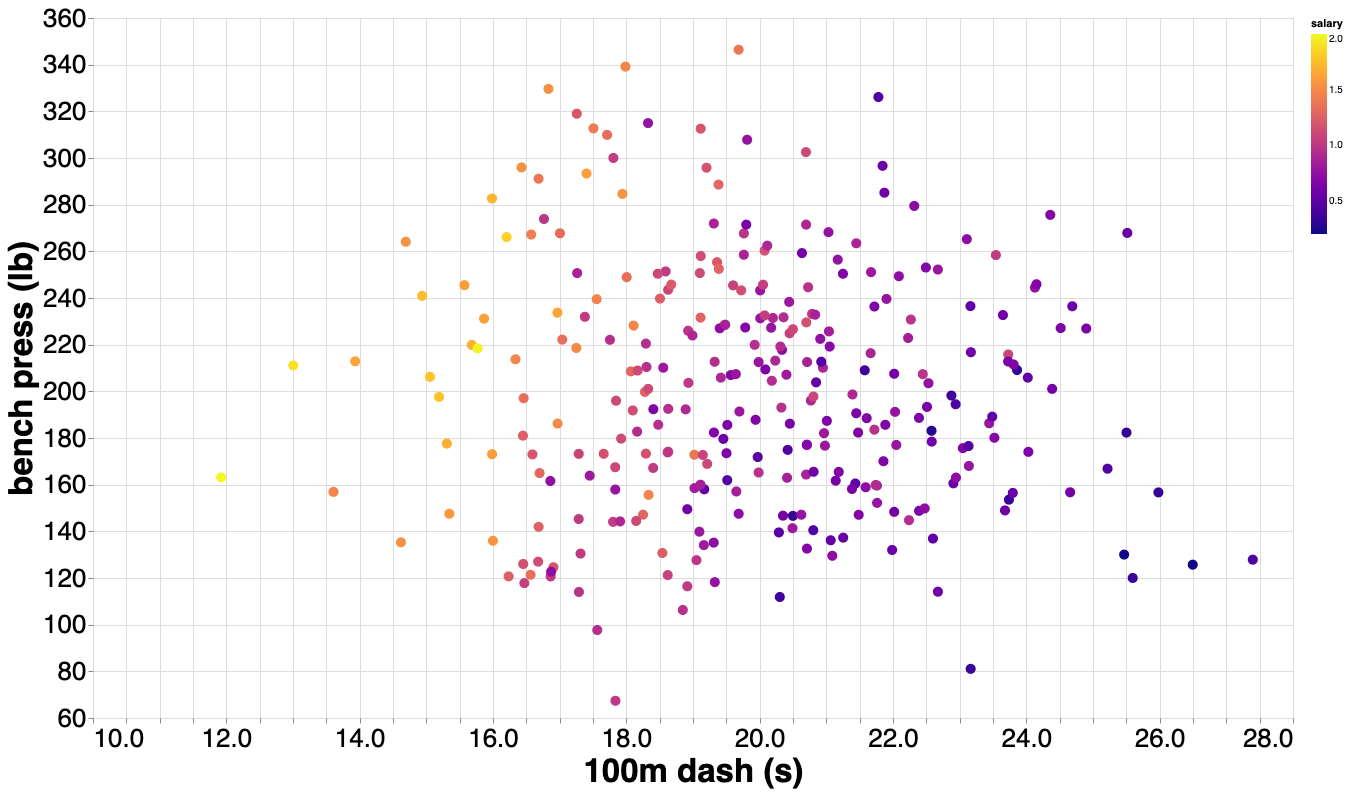

In [46]:
alt.Chart(data=d,
          height=700,
          width=1200,
).configure_axis(
    domain=False,
    labelFontSize=26,
    titleFontSize=33,
).mark_point(
    size=100,
    opacity=1.0,
    filled=True,
).encode(
    alt.X('100m dash (s)',
          scale=alt.Scale(zero=False),
         ),
    alt.Y('bench press (lb)',
          scale=alt.Scale(zero=False),
         ),
    color=alt.Color('salary', scale=alt.Scale(scheme='plasma'))
)